In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

### Load data

In [2]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Scale images and labels

In [3]:
scaler = StandardScaler()

x_train_scaler = scaler.fit(x_train)
x_train = x_train_scaler.transform(x_train)
x_test = x_train_scaler.transform(x_test)

y_train_scaler = scaler.fit(y_train)
y_train = y_train_scaler.transform(y_train)

## Linear Regression

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [5]:
y_pred = lin_reg.predict(x_test)
y_pred = y_train_scaler.inverse_transform(y_pred)  # get unscaled
y_pred = y_pred.clip(0.0, 9.0)  # set values to [0, 9]
y_pred = np.round(y_pred)

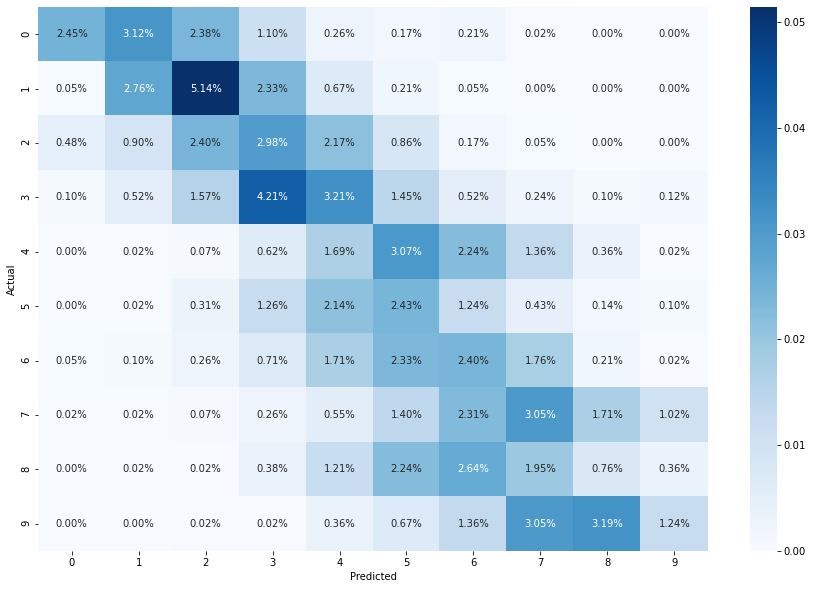

In [6]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [7]:
print(f'Accuracy {accuracy}')

Accuracy 0.23404761904761906


## Polynomial Regression

> **not enough memory**

> **too long runtime**

In [8]:
# def PolynomialRegression(degree=2, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# param_grid = {'polynomialfeatures__degree': np.arange(2, 4)}
# grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')

# grid_search.fit(x_train, y_train)
# grid_search.best_params_